In [2]:
import pandas as pd
import plotly as plt
import plotly.express as px
import sklearn as sc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("data/PredictStudentDropoutAndAcademicSuccess.csv", header=0, delimiter=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
# Store original Target categories for reference
df['Target'] = pd.Categorical(df['Target'])
target_categories = df['Target'].cat.categories
print("Target categories:", target_categories)

# Create a mapping for later use if needed
target_mapping = {i: cat for i, cat in enumerate(target_categories)}
print("\nCategory mapping:")
for i, category in target_mapping.items():
    print(f"{i} - {category}")

Target categories: Index(['Dropout', 'Enrolled', 'Graduate'], dtype='object')

Category mapping:
0 - Dropout
1 - Enrolled
2 - Graduate


## Adat előkészítése

We'll convert Target to numerical values for modeling, but keep the original meaning:

0 - Dropout

1 - Enrolled (will be removed)

2 - Graduate/Success

In [5]:
# Simple mapping instead of OrdinalEncoder to maintain interpretability
# This is just category encoding, not normalization
df['Target'] = df['Target'].cat.codes
print("Target unique values after encoding:", df['Target'].unique())

# Remove all rows where Target = 1 (Enrolled class)
print(f"Original dataset shape: {df.shape}")
df = df[df['Target'] != 1]
print(f"Dataset shape after removing Enrolled class: {df.shape}")

# Remove all features with 'enrolled' in their name
enrolled_columns = [col for col in df.columns if 'enrolled' in col.lower()]
print(f"\nRemoving {len(enrolled_columns)} columns containing 'enrolled':", enrolled_columns)
df = df.drop(columns=enrolled_columns)
print(f"Final dataset shape: {df.shape}")

# Display the first few rows
df.head()

Target unique values after encoding: [0 2 1]
Original dataset shape: (4424, 37)
Dataset shape after removing Enrolled class: (3630, 37)

Removing 2 columns containing 'enrolled': ['Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']
Final dataset shape: (3630, 35)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,13.000000,0,13.9,-0.3,0.79,2


In [6]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',

In [7]:
# Extract Target correlations and create a horizontal bar chart
spearman_corr = df.corr(method='spearman')
target_correlations = spearman_corr.loc['Target'].sort_values(key=abs, ascending=False)
# Remove self-correlation (always 1.0)
target_correlations = target_correlations[target_correlations.index != 'Target']

# Create a horizontal bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    y=target_correlations.index,
    x=target_correlations.values,
    orientation='h',
    marker=dict(
        color=target_correlations.values,
        colorscale='RdBu_r',  # Red for negative, Blue for positive
        cmin=-0.8,
        cmax=0.8
    )
))

# Add value annotations
for i, value in enumerate(target_correlations.values):
    fig.add_annotation(
        x=value + (0.05 if value > 0 else -0.05),
        y=target_correlations.index[i],
        text=f"{value:.3f}",
        showarrow=False,
        font=dict(size=12),
        xanchor='left' if value > 0 else 'right'
    )

# Update layout
fig.update_layout(
    title="Correlations with Target Variable",
    xaxis_title="Correlation Coefficient",
    yaxis_title="Features",
    width=900,
    height=1200,
    margin=dict(l=200, r=100),  # Increase left margin for feature names
    xaxis=dict(range=[-0.8, 0.8])  # Set x-axis range
)

# Add a vertical line at x=0
fig.add_shape(
    type="line",
    x0=0, y0=-0.5,
    x1=0, y1=len(target_correlations)-0.5,
    line=dict(color="black", width=1, dash="dash")
)

fig.show()

## Feature Engineering

Before proceeding with model training, let's examine relationships between similar features and perform some feature engineering to improve our models.

Curricular unit features:
1. Curricular units 1st sem (credited)
2. Curricular units 1st sem (evaluations)
3. Curricular units 1st sem (approved)
4. Curricular units 1st sem (grade)
5. Curricular units 1st sem (without evaluations)
6. Curricular units 2nd sem (credited)
7. Curricular units 2nd sem (evaluations)
8. Curricular units 2nd sem (approved)
9. Curricular units 2nd sem (grade)
10. Curricular units 2nd sem (without evaluations)


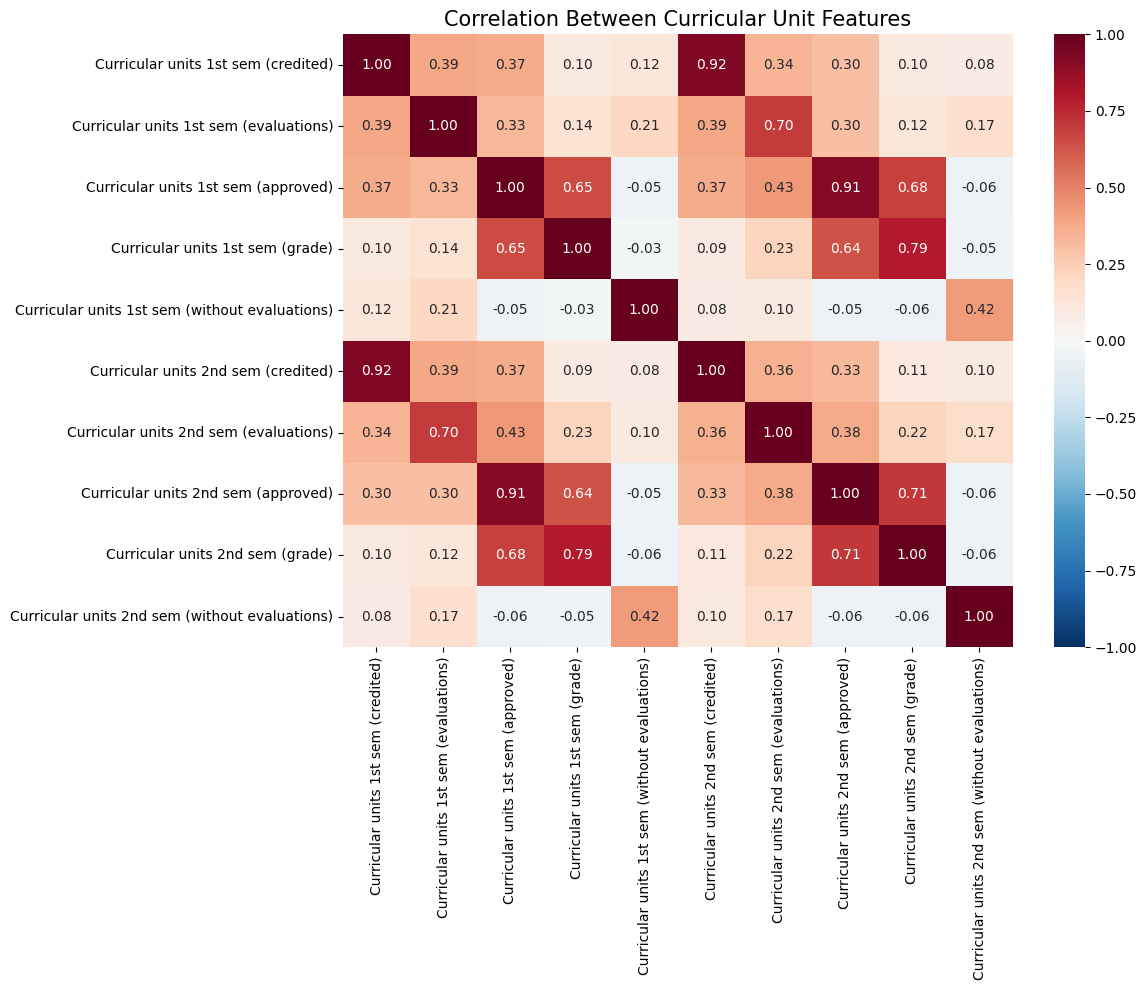

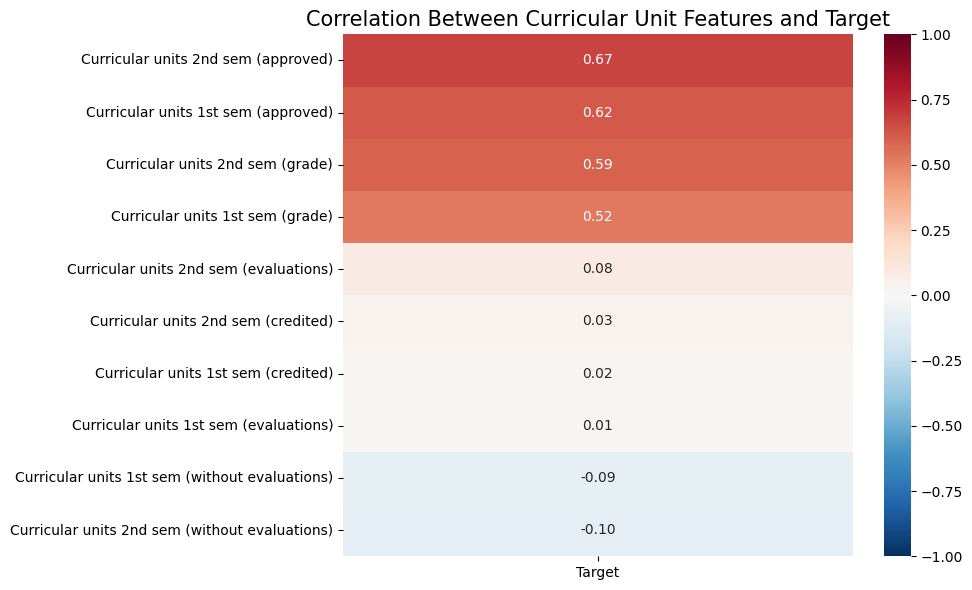


Top curricular features correlated with Target:
                                                  Target
Curricular units 2nd sem (approved)             0.672831
Curricular units 1st sem (approved)             0.616451
Curricular units 2nd sem (grade)                0.587241
Curricular units 1st sem (grade)                0.523679
Curricular units 2nd sem (evaluations)          0.081637
Curricular units 2nd sem (credited)             0.034302
Curricular units 1st sem (credited)             0.019520
Curricular units 1st sem (evaluations)          0.013013
Curricular units 1st sem (without evaluations) -0.086238
Curricular units 2nd sem (without evaluations) -0.095724


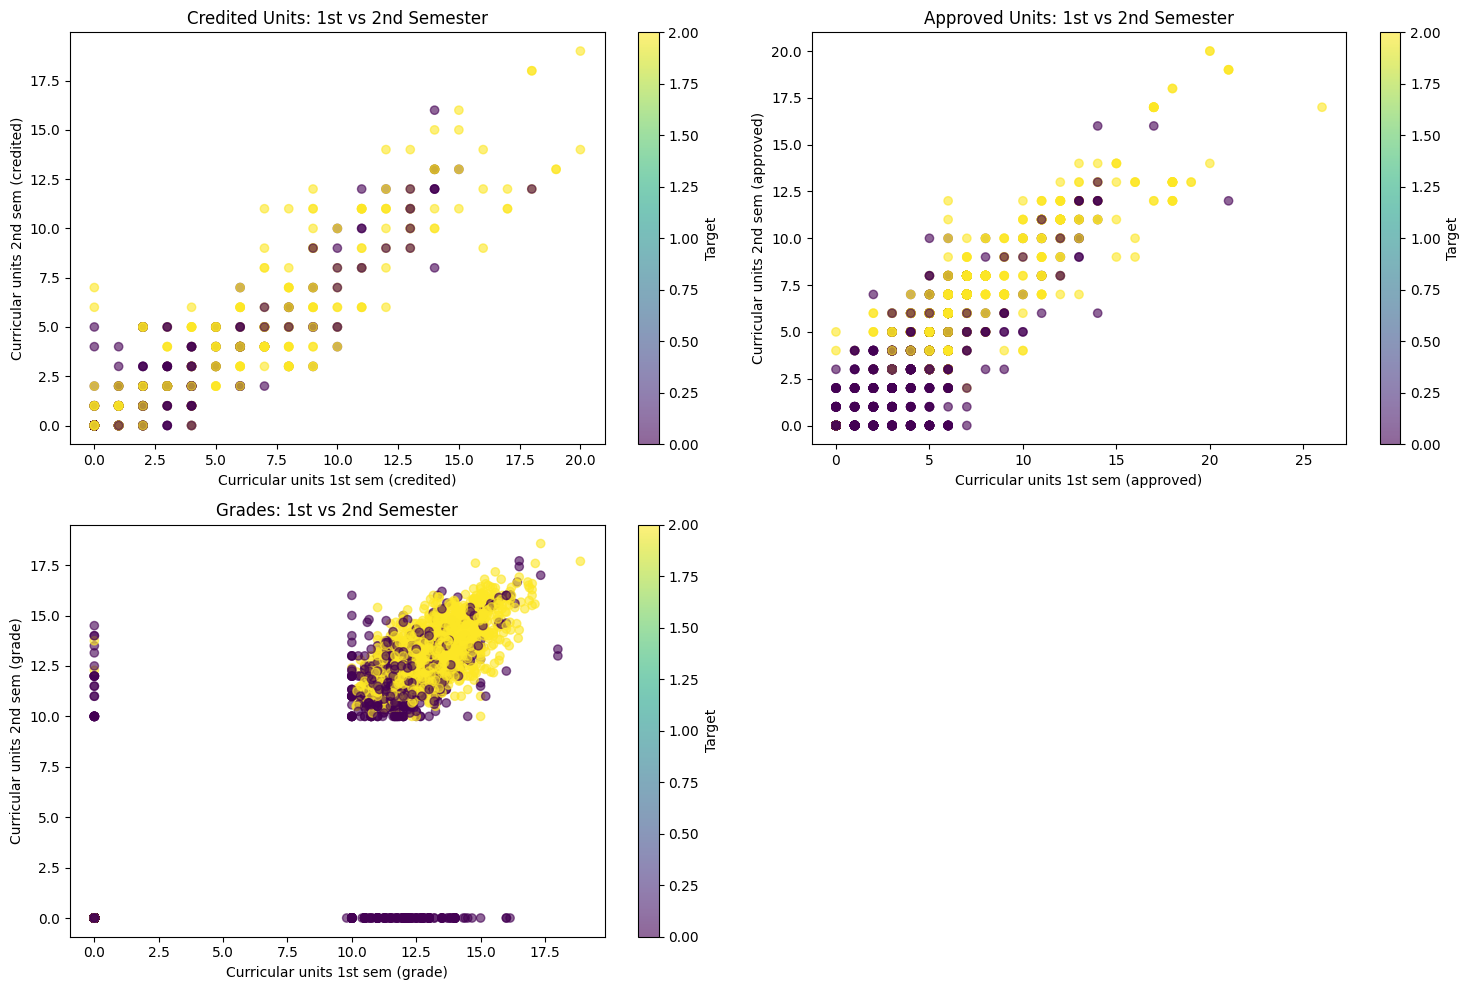

In [8]:
# Calculate correlations between all features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr(method='spearman')
spearman_corr = corr_matrix

# Select Curricular unit features
curricular_features = [col for col in df.columns if 'Curricular units' in col]
print("Curricular unit features:")
for i, feature in enumerate(curricular_features):
    print(f"{i+1}. {feature}")

# Examine correlations between curricular unit features
curricular_corr = corr_matrix.loc[curricular_features, curricular_features]

# Plot a correlation heatmap for the curricular unit features
plt.figure(figsize=(12, 10))
sns.heatmap(curricular_corr, annot=True, cmap='RdBu_r', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Between Curricular Unit Features', fontsize=15)
plt.tight_layout()
plt.show()

# Create a correlation matrix with target for curricular features
plt.figure(figsize=(10, 6))
target_corr = corr_matrix.loc[curricular_features, ['Target']].sort_values('Target', ascending=False)
sns.heatmap(target_corr, annot=True, cmap='RdBu_r', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Between Curricular Unit Features and Target', fontsize=15)
plt.tight_layout()
plt.show()

# Print the most correlated curricular features with the target
print("\nTop curricular features correlated with Target:")
print(target_corr)

# Visualize relationships between 1st and 2nd semester metrics
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['Curricular units 1st sem (credited)'], df['Curricular units 2nd sem (credited)'], 
           c=df['Target'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Target')
plt.xlabel('Curricular units 1st sem (credited)')
plt.ylabel('Curricular units 2nd sem (credited)')
plt.title('Credited Units: 1st vs 2nd Semester')

plt.subplot(2, 2, 2)
plt.scatter(df['Curricular units 1st sem (approved)'], df['Curricular units 2nd sem (approved)'], 
           c=df['Target'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Target')
plt.xlabel('Curricular units 1st sem (approved)')
plt.ylabel('Curricular units 2nd sem (approved)')
plt.title('Approved Units: 1st vs 2nd Semester')

plt.subplot(2, 2, 3)
plt.scatter(df['Curricular units 1st sem (grade)'], df['Curricular units 2nd sem (grade)'], 
           c=df['Target'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Target')
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Grades: 1st vs 2nd Semester')

plt.tight_layout()
plt.show()

In [9]:
# Create engineered features based on curricular unit relationships
df_fe = df.copy()

# 1. Sum of units across semesters
df_fe['Total_credited_units'] = df['Curricular units 1st sem (credited)'] + df['Curricular units 2nd sem (credited)']
# Note: Total_enrolled_units is removed since it depends on 'enrolled' features
df_fe['Total_approved_units'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']
df_fe['Total_evaluations'] = df['Curricular units 1st sem (evaluations)'] + df['Curricular units 2nd sem (evaluations)']

# 2. Differences between semesters to capture trends
df_fe['Credited_diff'] = df['Curricular units 2nd sem (credited)'] - df['Curricular units 1st sem (credited)']
# Note: Enrolled_diff is removed since it depends on 'enrolled' features
df_fe['Approved_diff'] = df['Curricular units 2nd sem (approved)'] - df['Curricular units 1st sem (approved)']
df_fe['Grade_diff'] = df['Curricular units 2nd sem (grade)'] - df['Curricular units 1st sem (grade)']

# 3. Ratios between related metrics
# Note: Approved_enrolled_ratio features are removed since they depend on 'enrolled' features

# 4. Success metrics
df_fe['Success_rate_1st'] = df['Curricular units 1st sem (approved)'] / df['Curricular units 1st sem (evaluations)'].replace(0, 1)
df_fe['Success_rate_2nd'] = df['Curricular units 2nd sem (approved)'] / df['Curricular units 2nd sem (evaluations)'].replace(0, 1)
df_fe['Overall_success_rate'] = df_fe['Total_approved_units'] / df_fe['Total_evaluations'].replace(0, 1)

# 5. Grade efficiency (average grade per approved unit)
df_fe['Grade_efficiency_1st'] = df['Curricular units 1st sem (grade)'] / df['Curricular units 1st sem (approved)'].replace(0, 1)
df_fe['Grade_efficiency_2nd'] = df['Curricular units 2nd sem (grade)'] / df['Curricular units 2nd sem (approved)'].replace(0, 1)

# Display new features
new_features = [col for col in df_fe.columns if col not in df.columns]
print(f"Created {len(new_features)} new engineered features:")
for i, feature in enumerate(new_features):
    print(f"{i+1}. {feature}")

# Calculate correlations with target for the new features
new_features_corr = df_fe[new_features + ['Target']].corr()['Target'].sort_values(ascending=False)
print("\nCorrelations of new features with Target:")
print(new_features_corr)

Created 11 new engineered features:
1. Total_credited_units
2. Total_approved_units
3. Total_evaluations
4. Credited_diff
5. Approved_diff
6. Grade_diff
7. Success_rate_1st
8. Success_rate_2nd
9. Overall_success_rate
10. Grade_efficiency_1st
11. Grade_efficiency_2nd

Correlations of new features with Target:
Target                  1.000000
Success_rate_2nd        0.724956
Overall_success_rate    0.717475
Success_rate_1st        0.666946
Total_approved_units    0.616893
Grade_diff              0.233148
Approved_diff           0.207120
Total_evaluations       0.093365
Total_credited_units    0.050032
Grade_efficiency_2nd   -0.004008
Credited_diff          -0.011873
Grade_efficiency_1st   -0.078760
Name: Target, dtype: float64


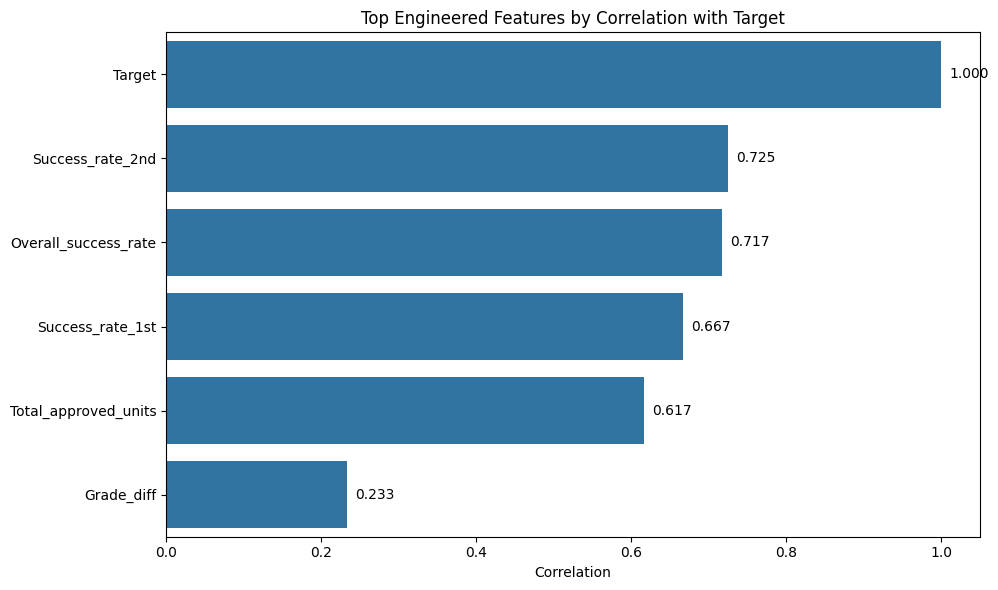

Selected 15 features for modeling:
1. Tuition fees up to date
2. Age at enrollment
3. Scholarship holder
4. Debtor
5. Gender
6. Application mode
7. Previous qualification
8. Admission grade
9. Displaced
10. Marital status
11. Previous qualification (grade)
12. Success_rate_2nd
13. Overall_success_rate
14. Success_rate_1st
15. Total_approved_units


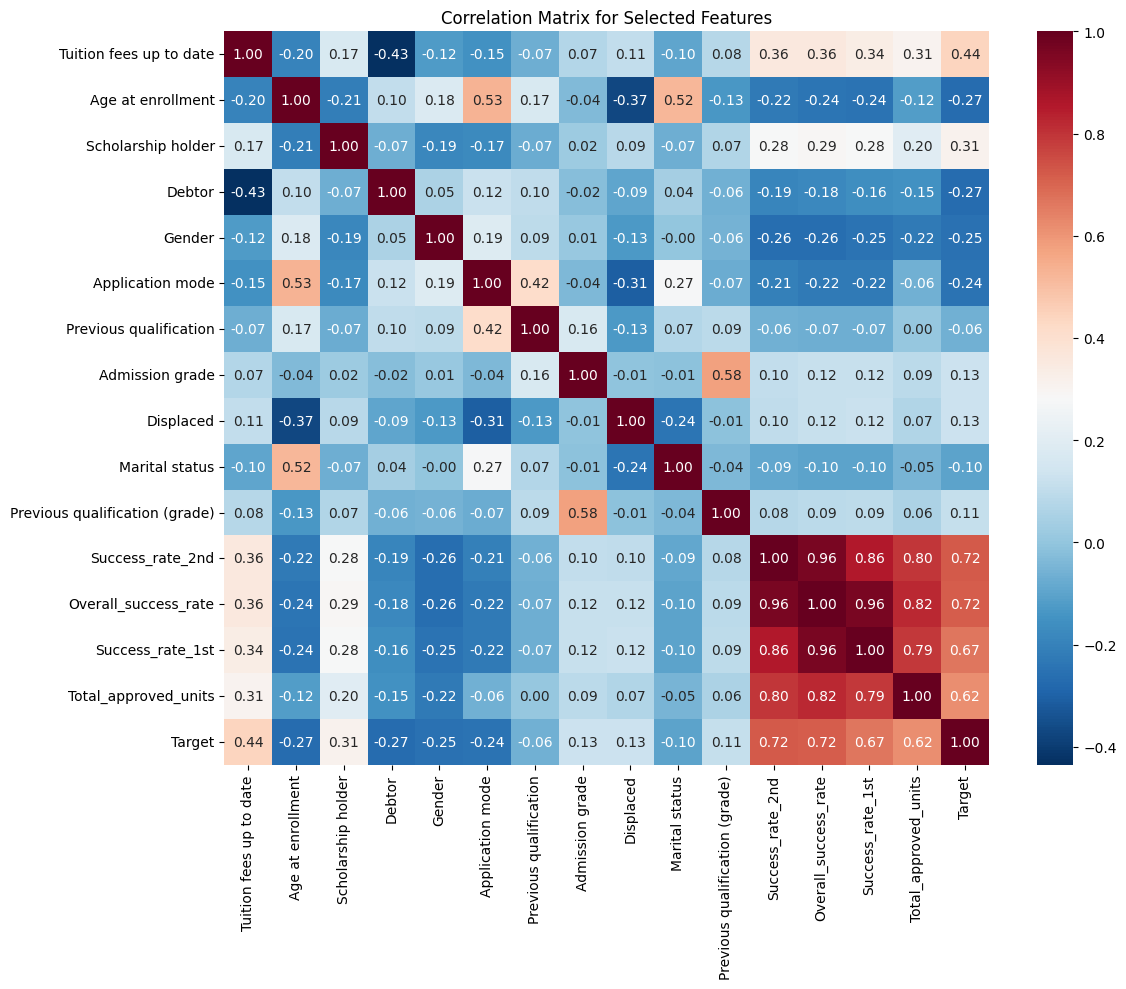

In [10]:
# Visualize the most important engineered features
top_new_features = new_features_corr.abs().nlargest(6).index.tolist()

# Plot correlations for top engineered features
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=new_features_corr[top_new_features].values, y=top_new_features)
plt.title('Top Engineered Features by Correlation with Target')
plt.xlabel('Correlation')
plt.tight_layout()

# Add correlation values as text
for i, v in enumerate(new_features_corr[top_new_features].values):
    ax.text(v + (0.01 if v >= 0 else -0.07), i, f"{v:.3f}", va='center')

plt.show()

# Identify original curricular unit features that were used to create engineered features
curricular_original_features = [col for col in df.columns if 'Curricular units' in col]

# Create and visualize a smaller dataset with important original features (excluding curricular units) and engineered features
# Select top original features based on correlation with target, excluding curricular units used for engineering
top_original_features = [feature for feature in target_correlations.iloc[:15].index.tolist() 
                        if feature not in curricular_original_features]

# Add top 5 engineered features, explicitly excluding Target (which shouldn't be a feature)
top_engineered_features = [feature for feature in new_features_corr.abs().nlargest(5).index.tolist() 
                          if feature != 'Target']

# Combine the features
selected_features = top_original_features + top_engineered_features
print(f"Selected {len(selected_features)} features for modeling:")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

# Create the reduced dataset
X_selected = df_fe[selected_features]
y = df_fe['Target']

# Calculate the correlation matrix for the selected features
selected_corr = df_fe[selected_features + ['Target']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.tight_layout()
plt.show()

## Modified Dataset with Engineered Features

Next, we'll compare model performance using the traditional approach (all original features) with our feature-engineered approach (selected non-redundant features).

In [11]:
# Prepare datasets for comparison
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Option 1: Original approach with all features
X_orig = df.drop('Target', axis=1)
y_orig = df['Target']

# Option 2: Feature engineered approach (selected features only)
X_fe = X_selected
y_fe = y

print(f"Original dataset shape: {X_orig.shape}")
print(f"Feature-engineered dataset shape: {X_fe.shape}")

# Split both datasets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig, y_orig, test_size=0.3, random_state=42)

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.3, random_state=42)

# Scale features
scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)

scaler_fe = StandardScaler()
X_train_fe_scaled = scaler_fe.fit_transform(X_train_fe)
X_test_fe_scaled = scaler_fe.transform(X_test_fe)

print("\nDatasets prepared for model comparison")

Original dataset shape: (3630, 34)
Feature-engineered dataset shape: (3630, 15)

Datasets prepared for model comparison


## Comparing Models with Original vs Engineered Features

Now we'll train and evaluate models using both feature sets to see if our feature engineering improves performance.

Logistic Regression - Original Features (Scaled) - Accuracy: 0.9063
Logistic Regression - Engineered Features (Scaled) - Accuracy: 0.8898
Decision Tree - Original Features (Unscaled) - Accuracy: 0.8916
Decision Tree - Engineered Features (Unscaled) - Accuracy: 0.8944
KNN - Original Features (Unscaled) - Accuracy: 0.7686
KNN - Engineered Features (Unscaled) - Accuracy: 0.8292


/home/mimre/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.

/home/mimre/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.



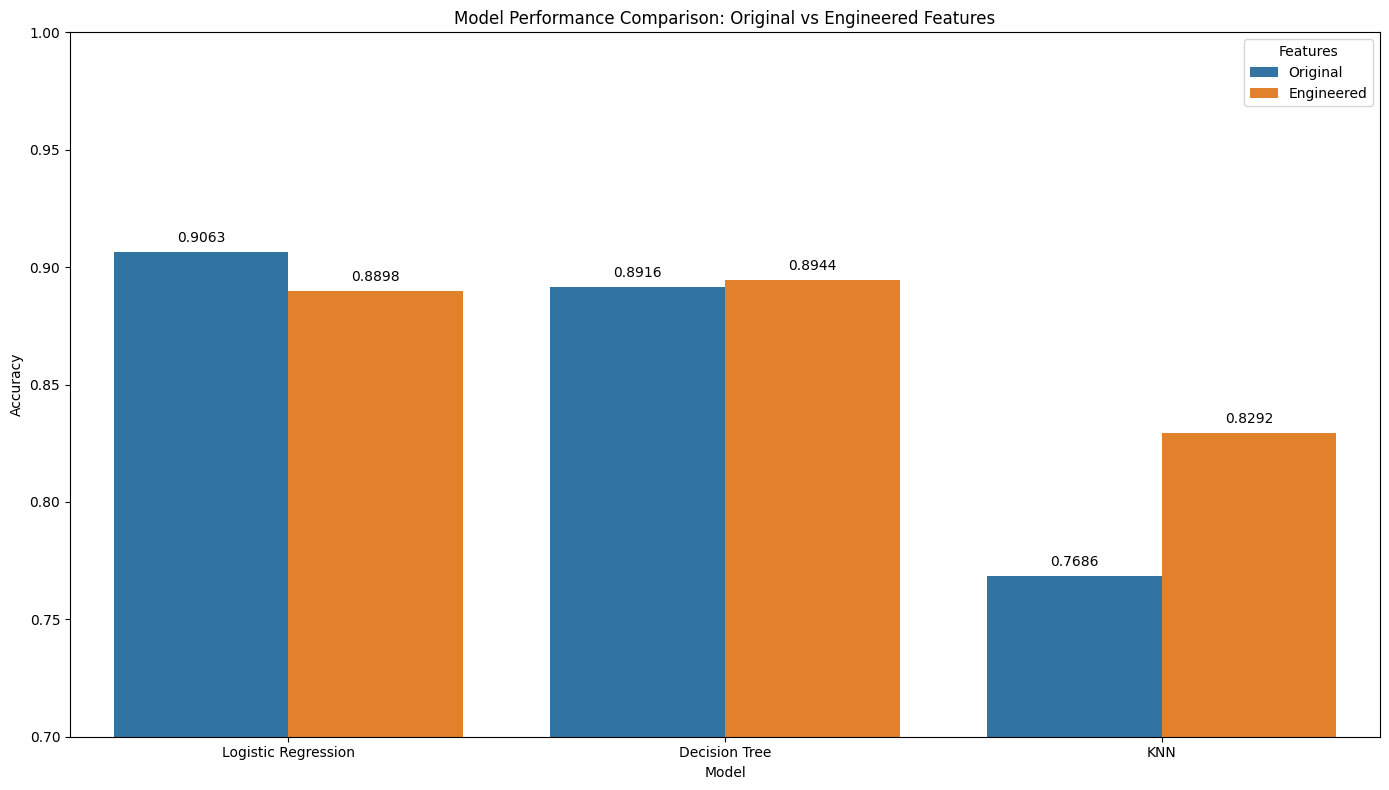


Feature Engineering Impact Summary:
Features             Engineered  Original  Improvement  % Change
Model                                                           
Decision Tree          0.894399  0.891644     0.002755      0.31
KNN                    0.829201  0.768595     0.060606      7.89
Logistic Regression    0.889807  0.906336    -0.016529     -1.82

Scaling Used Per Model:
Scaling                Scaled  Unscaled
Model                                  
Decision Tree             NaN  0.893021
KNN                       NaN  0.798898
Logistic Regression  0.898072       NaN


In [12]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store results
results = {
    'Model': [],
    'Features': [],
    'Scaling': [],
    'Accuracy': []
}

# Function to train model and get accuracy
def train_evaluate(model, X_train, y_train, X_test, y_test, model_name, feature_set, scaling='Scaled'):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Features'].append(feature_set)
    results['Scaling'].append(scaling)
    results['Accuracy'].append(acc)
    print(f"{model_name} - {feature_set} Features ({scaling}) - Accuracy: {acc:.4f}")
    return model, y_pred

# Logistic Regression - requires scaling
lr_orig, lr_orig_pred = train_evaluate(
    LogisticRegression(max_iter=1000, multi_class='multinomial'),
    X_train_orig_scaled, y_train_orig, X_test_orig_scaled, y_test_orig,
    'Logistic Regression', 'Original', 'Scaled'
)

lr_fe, lr_fe_pred = train_evaluate(
    LogisticRegression(max_iter=1000, multi_class='multinomial'),
    X_train_fe_scaled, y_train_fe, X_test_fe_scaled, y_test_fe,
    'Logistic Regression', 'Engineered', 'Scaled'
)

# Decision Tree - without scaling
dt_orig, dt_orig_pred = train_evaluate(
    DecisionTreeClassifier(random_state=42, max_depth=3),
    X_train_orig, y_train_orig, X_test_orig, y_test_orig,
    'Decision Tree', 'Original', 'Unscaled'
)

dt_fe, dt_fe_pred = train_evaluate(
    DecisionTreeClassifier(random_state=42, max_depth=3),
    X_train_fe, y_train_fe, X_test_fe, y_test_fe,
    'Decision Tree', 'Engineered', 'Unscaled'
)

# KNN - without scaling
knn_orig, knn_orig_pred = train_evaluate(
    KNeighborsClassifier(n_neighbors=7),
    X_train_orig, y_train_orig, X_test_orig, y_test_orig,
    'KNN', 'Original', 'Unscaled'
)

knn_fe, knn_fe_pred = train_evaluate(
    KNeighborsClassifier(n_neighbors=7),
    X_train_fe, y_train_fe, X_test_fe, y_test_fe,
    'KNN', 'Engineered', 'Unscaled'
)

# Create a DataFrame with results
results_df = pd.DataFrame(results)

# Visualize the results by model and feature set
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='Accuracy', hue='Features', data=results_df)
plt.title('Model Performance Comparison: Original vs Engineered Features')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Adjust as needed for your results

# Add text labels on the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.4f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

# Print a summary table
print("\nFeature Engineering Impact Summary:")
# Group by Model and Features and calculate mean accuracy
summary = results_df.groupby(['Model', 'Features'])['Accuracy'].mean().reset_index().pivot(index='Model', columns='Features', values='Accuracy')
summary['Improvement'] = summary['Engineered'] - summary['Original']
summary['% Change'] = (summary['Improvement'] / summary['Original'] * 100).round(2)
print(summary)

# Also display information about scaling per model
print("\nScaling Used Per Model:")
scaling_info = results_df.groupby(['Model', 'Scaling'])['Accuracy'].mean().reset_index()
print(scaling_info.pivot(index='Model', columns='Scaling', values='Accuracy'))

## Model Performance Analysis with Feature Engineering

Let's analyze the effects of our feature engineering in more detail, focusing on how each type of model responds to the engineered features.

Top 10 important features in Decision Tree with engineered features:
                   Feature  Importance
0         Success_rate_2nd    0.823445
1  Tuition fees up to date    0.087797
2     Total_approved_units    0.049184
3     Overall_success_rate    0.022758
4       Scholarship holder    0.016815
5                   Debtor    0.000000
6        Age at enrollment    0.000000
7   Previous qualification    0.000000
8         Application mode    0.000000
9                   Gender    0.000000


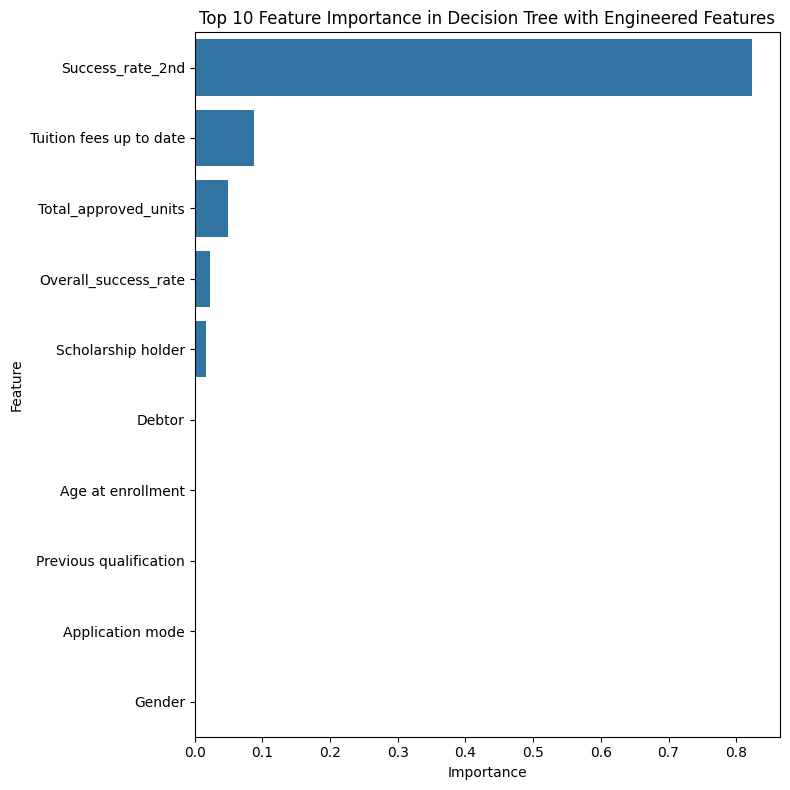


Engineered features importance in Decision Tree:
                 Feature  Importance
0       Success_rate_2nd    0.823445
2   Total_approved_units    0.049184
3   Overall_success_rate    0.022758
14      Success_rate_1st    0.000000


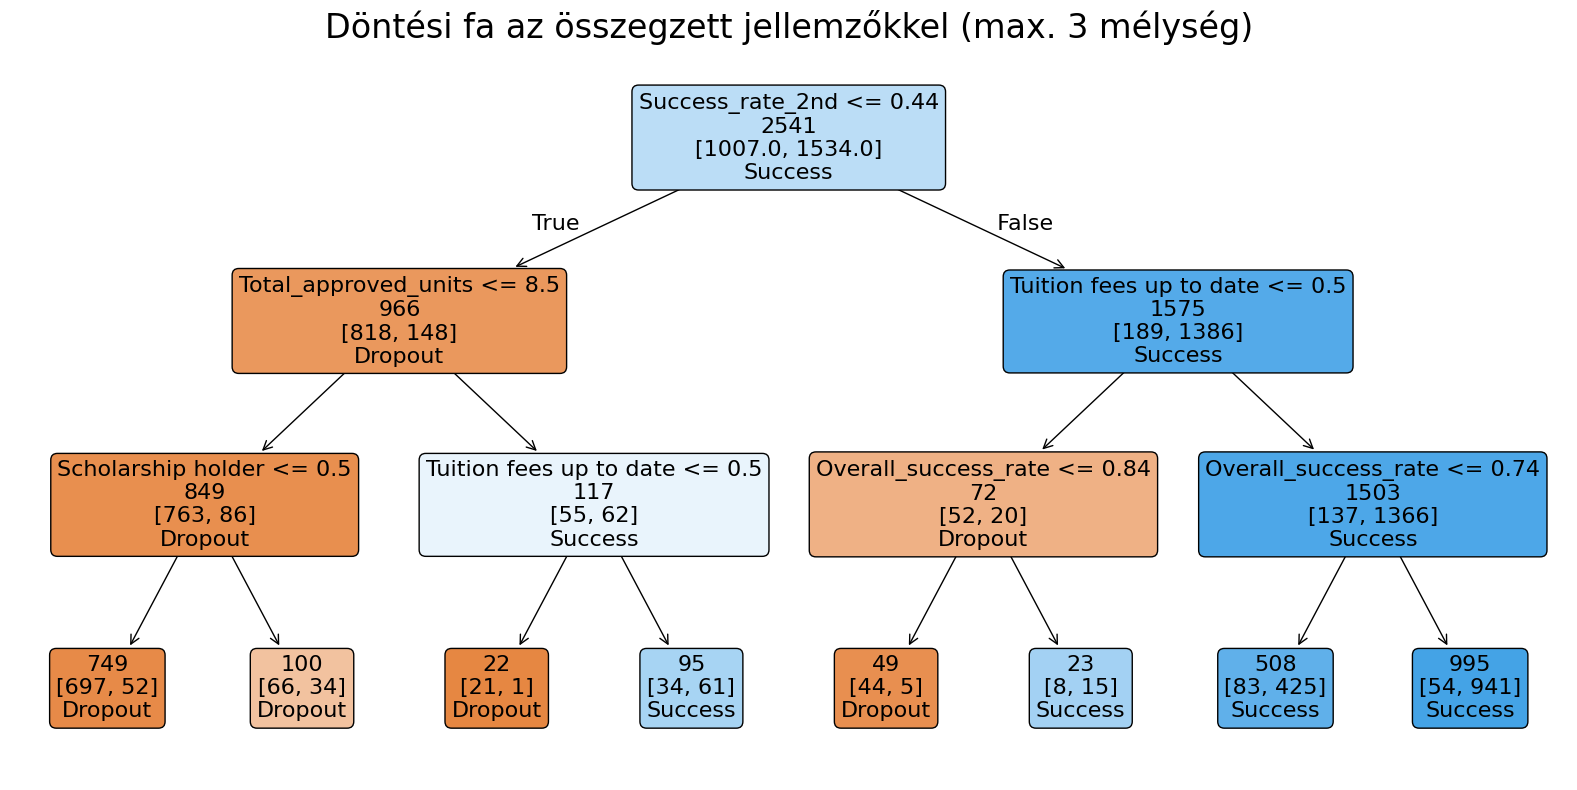


The most important splitting feature at the root is: Success_rate_2nd

KNN Error Analysis:
Errors with original features: 252 (23.14%)
Errors with engineered features: 186 (17.08%)

Class-wise accuracy comparison for KNN:
     Class  Original Accuracy  Engineered Accuracy  Improvement
0  Dropout           0.589372             0.700483     0.111111
1  Success           0.878519             0.908148     0.029630


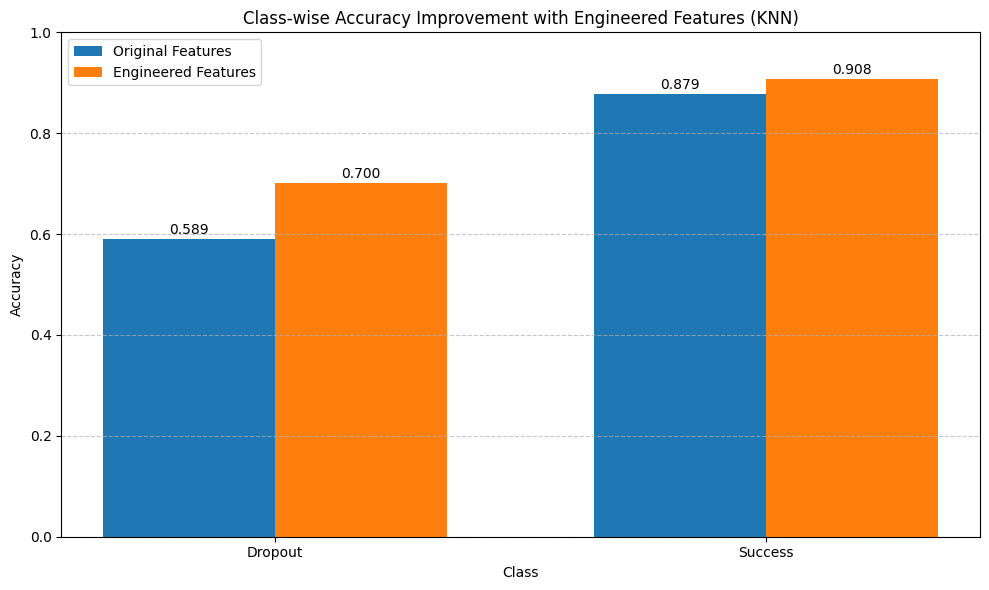

In [13]:
# Analyze feature importance in Decision Tree with engineered features
# Since we used unscaled data for Decision Tree, let's examine which features it found most important

# Get feature importances from the Decision Tree model with engineered features
dt_fe_importances = dt_fe.feature_importances_
dt_fe_feature_names = X_fe.columns

# Create DataFrame with feature importances
dt_fe_importance_df = pd.DataFrame({
    'Feature': dt_fe_feature_names,
    'Importance': dt_fe_importances
})

# Sort by importance
dt_fe_importance_df = dt_fe_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display top 10 features
print("Top 10 important features in Decision Tree with engineered features:")
print(dt_fe_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=dt_fe_importance_df.head(10))
plt.title('Top 10 Feature Importance in Decision Tree with Engineered Features')
plt.tight_layout()
plt.show()

# Let's also check which engineered features were most useful
engineered_importance = dt_fe_importance_df[dt_fe_importance_df['Feature'].isin(top_engineered_features)]
print("\nEngineered features importance in Decision Tree:")
print(engineered_importance)

# Visualize the decision tree structure
from sklearn import tree
plt.figure(figsize=(16, 8))
tree.plot_tree(dt_fe, feature_names=dt_fe_feature_names, 
               class_names=['Dropout', 'Success'], label="none", impurity=False, precision=2,
               filled=True, rounded=True, fontsize=16)
plt.title('Döntési fa az összegzett jellemzőkkel (max. 3 mélység)', fontsize=24)
plt.tight_layout()
plt.show()

# Print the feature used at the root node (most important split)
root_feature_index = dt_fe.tree_.feature[0]
if root_feature_index != -2:  # -2 indicates leaf node
    root_feature = dt_fe_feature_names[root_feature_index]
    print(f"\nThe most important splitting feature at the root is: {root_feature}")

# Analyze KNN errors with original vs engineered features
print("\nKNN Error Analysis:")
original_errors = (knn_orig_pred != y_test_orig).sum()
engineered_errors = (knn_fe_pred != y_test_fe).sum()
print(f"Errors with original features: {original_errors} ({original_errors/len(y_test_orig):.2%})")
print(f"Errors with engineered features: {engineered_errors} ({engineered_errors/len(y_test_fe):.2%})")

# Check if engineered features help with certain classes more than others
from sklearn.metrics import confusion_matrix
import numpy as np

# Get class-wise accuracy for original and engineered features
def class_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    class_acc = np.diag(cm) / cm.sum(axis=1)
    return class_acc

knn_orig_class_acc = class_accuracy(y_test_orig, knn_orig_pred)
knn_fe_class_acc = class_accuracy(y_test_fe, knn_fe_pred)

class_names = ['Dropout', 'Success']
class_comparison = pd.DataFrame({
    'Class': class_names,
    'Original Accuracy': knn_orig_class_acc,
    'Engineered Accuracy': knn_fe_class_acc,
    'Improvement': knn_fe_class_acc - knn_orig_class_acc
})

print("\nClass-wise accuracy comparison for KNN:")
print(class_comparison)

# Visualize class-wise improvement
plt.figure(figsize=(10, 6))
x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, knn_orig_class_acc, width, label='Original Features')
plt.bar(x + width/2, knn_fe_class_acc, width, label='Engineered Features')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy Improvement with Engineered Features (KNN)')
plt.xticks(x, class_names)
plt.ylim(0, 1.0)  # Adjust as needed
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text above bars
for i, (orig, eng) in enumerate(zip(knn_orig_class_acc, knn_fe_class_acc)):
    plt.text(i - width/2, orig + 0.01, f"{orig:.3f}", ha='center')
    plt.text(i + width/2, eng + 0.01, f"{eng:.3f}", ha='center')

plt.tight_layout()
plt.show()

## Visualizing Top Engineered Features Relationship with Target Classes

Let's create a scatter plot using the two most important engineered features to see how well they separate the different target classes.

The two most important engineered features:
1. Success_rate_2nd
2. Overall_success_rate


/tmp/ipykernel_15927/305496440.py:27: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



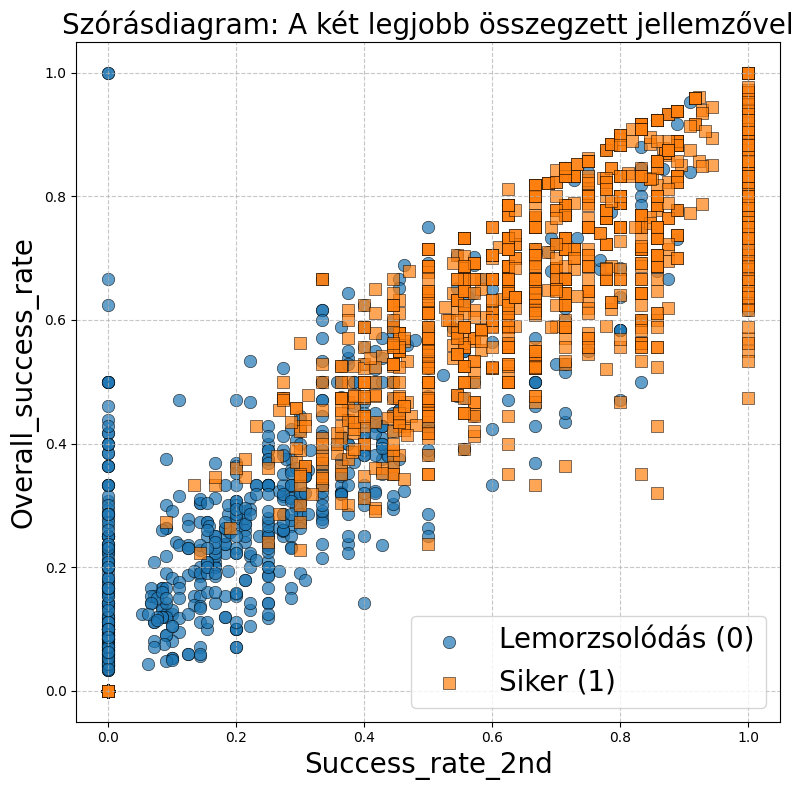

In [38]:
# Get the two most important engineered features based on correlation with target
top_2_engineered = [feature for feature in new_features_corr.abs().nlargest(2).index.tolist() 
                   if feature != 'Target']

# If we don't have 2 features yet (e.g., if 'Target' was in the top 2), add the next one
if len(top_2_engineered) < 2:
    more_features = [f for f in new_features_corr.abs().nlargest(3).index.tolist() 
                     if f != 'Target' and f not in top_2_engineered]
    top_2_engineered.extend(more_features[:2-len(top_2_engineered)])

print(f"The two most important engineered features:\n1. {top_2_engineered[0]}\n2. {top_2_engineered[1]}")

# Create a DataFrame for plotting with the two selected features
plot_df = df_fe[[top_2_engineered[0], top_2_engineered[1], 'Target']].copy()

# Create scatter plot using matplotlib with different marker shapes for each class
plt.figure(figsize=(8, 8), facecolor=None)

# Define marker shapes and colors for each target class
markers = ['o', 's']  # circle, triangle, square
colors = ['red', 'blue']
labels = ['Lemorzsolódás (0)', 'Siker (1)']

# Plot each target class separately with its own marker
for i, target_val in enumerate([0, 2]):
    mask = plot_df['Target'] == target_val
    plt.scatter(plot_df[mask][top_2_engineered[0]], 
                plot_df[mask][top_2_engineered[1]], 
                cmap='coolwarm',
                marker=markers[i], 
                s=80, 
                alpha=0.7,
                edgecolors='black',
                linewidths=0.5,
                label=labels[i])

plt.gcf().patch.set_alpha(0.0)
plt.xlabel(top_2_engineered[0], fontsize=20)
plt.ylabel(top_2_engineered[1], fontsize=20)
plt.title(f'Szórásdiagram: A két legjobb összegzett jellemzővel', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

## Visualizing Top Engineered Features with Decision Boundaries

Let's create scatter plots for the top 3 engineered features based on their correlation with the target, and visualize how they separate the classes with sigmoid curves and decision boundaries.

Top 3 engineered features by correlation with target:
1. Success_rate_2nd: 0.7250
2. Overall_success_rate: 0.7175


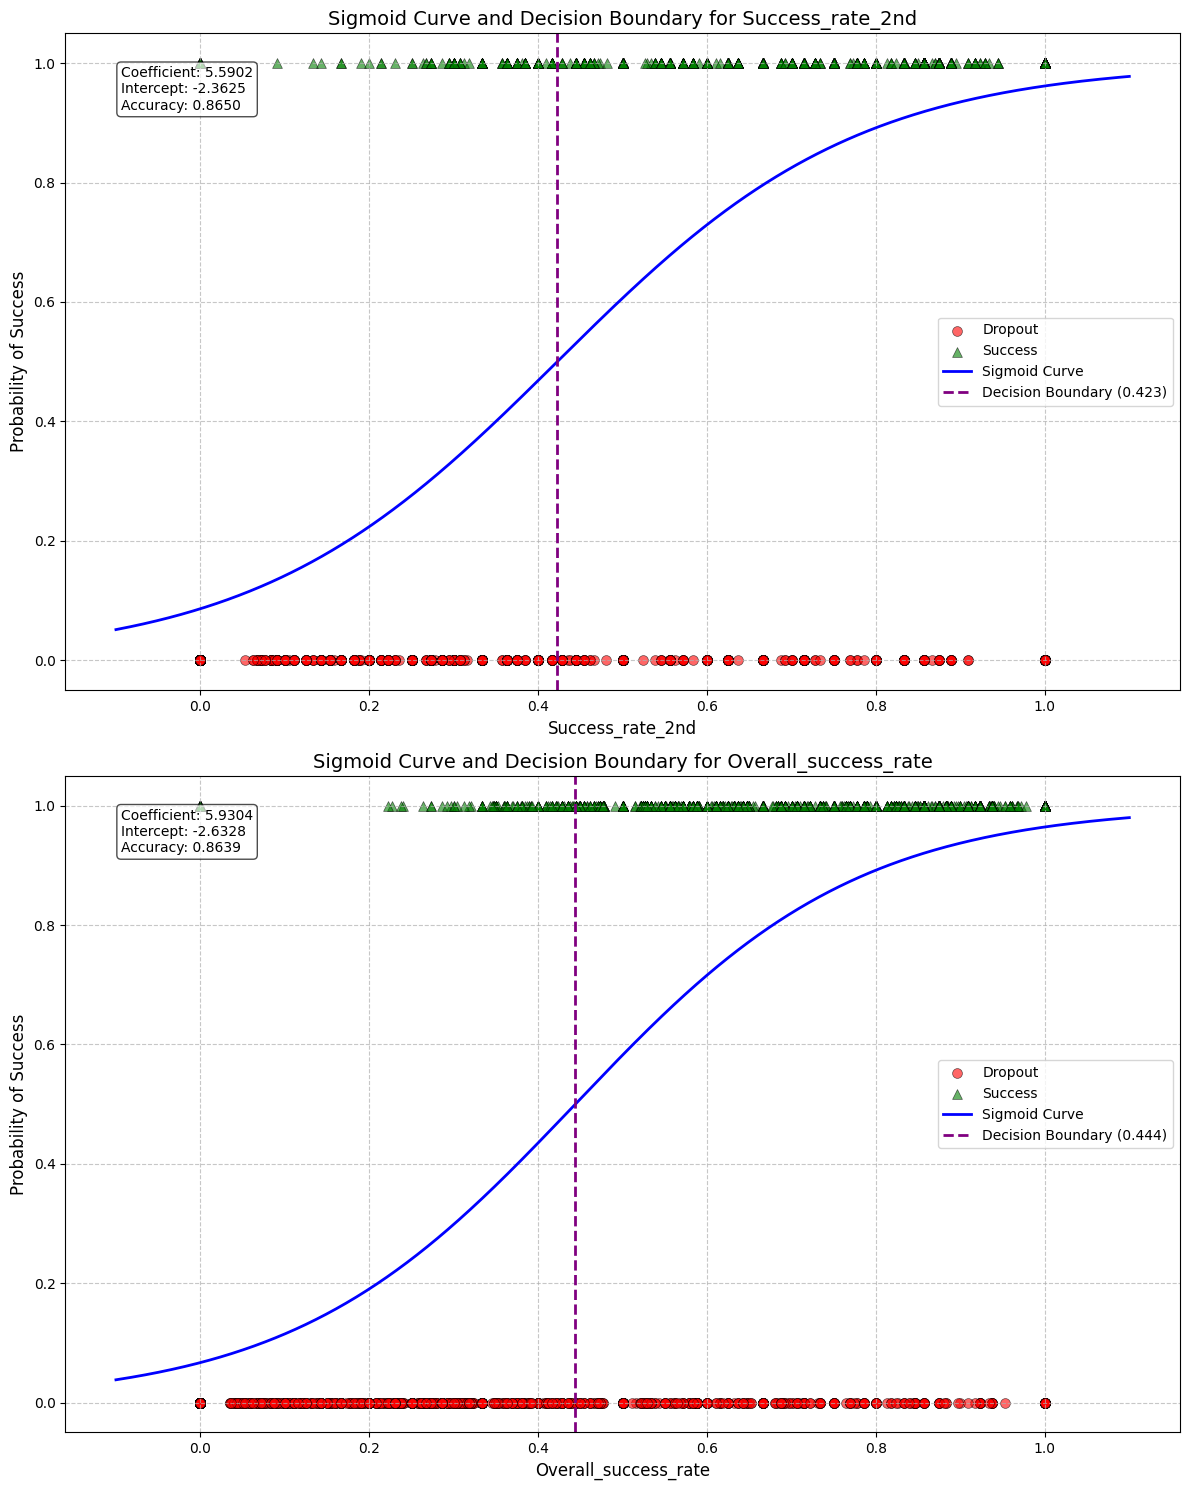


Feature Performance Summary (sorted by accuracy):
                Feature  Decision Boundary  Accuracy
0      Success_rate_2nd           0.422608  0.865014
1  Overall_success_rate           0.443957  0.863912


In [15]:
# Get top 3 engineered features by correlation with target
top_3_features = [feature for feature in new_features_corr.abs().nlargest(3).index.tolist() 
                  if feature != 'Target']
print(f"Top 3 engineered features by correlation with target:")
for i, feature in enumerate(top_3_features):
    print(f"{i+1}. {feature}: {new_features_corr[feature]:.4f}")

# Fit logistic regression for each feature and visualize
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a binary target (0 for Dropout, 1 for Success)
# Target is already 0 for Dropout, 2 for Success, so we just divide by 2
y_binary = df_fe['Target'] / 2

# Function to fit logistic regression and plot decision boundary
def plot_feature_with_sigmoid(feature_name, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Extract the feature data
    X = df_fe[feature_name].values.reshape(-1, 1)
    
    # Fit logistic regression
    lr = LogisticRegression()
    lr.fit(X, y_binary)
    
    # Generate points for sigmoid curve
    x_min, x_max = X.min() - 0.1, X.max() + 0.1
    x_points = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
    y_proba = lr.predict_proba(x_points)[:, 1]
    
    # Find decision boundary (where probability = 0.5)
    decision_boundary = -lr.intercept_[0] / lr.coef_[0][0]
    
    # Create scatter plot grouped by target class with distinct markers
    classes = [0, 2]  # Dropout (0) and Success (2)
    colors = ['red', 'green']
    markers = ['o', '^']
    labels = ['Dropout', 'Success']
    
    for i, cls in enumerate(classes):
        mask = df_fe['Target'] == cls
        ax.scatter(df_fe.loc[mask, feature_name], 
                  y_binary[mask], 
                  c=colors[i], 
                  marker=markers[i],
                  s=50, 
                  alpha=0.6, 
                  edgecolor='black',
                  linewidth=0.5,
                  label=labels[i])
    
    # Plot sigmoid curve
    ax.plot(x_points, y_proba, 'b-', linewidth=2, label='Sigmoid Curve')
    
    # Add decision boundary line
    ax.axvline(x=decision_boundary, color='purple', linestyle='--', 
              linewidth=2, label=f'Decision Boundary ({decision_boundary:.3f})')
    
    # Set labels and title
    ax.set_xlabel(feature_name, fontsize=12)
    ax.set_ylabel('Probability of Success', fontsize=12)
    ax.set_title(f'Sigmoid Curve and Decision Boundary for {feature_name}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=10)
    
    # Calculate accuracy at this decision boundary
    y_pred = (df_fe[feature_name] > decision_boundary).astype(int)
    accuracy = np.mean(y_pred == y_binary)
    
    # Add text with model details
    ax.text(0.05, 0.95, f"Coefficient: {lr.coef_[0][0]:.4f}\n"
            f"Intercept: {lr.intercept_[0]:.4f}\n"
            f"Accuracy: {accuracy:.4f}",
            transform=ax.transAxes, fontsize=10, va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    return ax, decision_boundary, accuracy

# Create subplots for each of the top 3 features
fig, axes = plt.subplots(len(top_3_features), 1, figsize=(12, 15))

# Store results for comparison
results = []

# Plot each feature
for i, feature in enumerate(top_3_features):
    ax, decision_boundary, accuracy = plot_feature_with_sigmoid(feature, axes[i])
    results.append((feature, decision_boundary, accuracy))

plt.tight_layout()
plt.show()

# Display a summary of the results
results_df = pd.DataFrame(results, columns=['Feature', 'Decision Boundary', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
print("\nFeature Performance Summary (sorted by accuracy):")
print(results_df)

## Visualizing Decision Boundaries in 2D Feature Space

Now let's visualize how the top 2 features combined can create a decision boundary in 2D space.

Using features Success_rate_2nd and Overall_success_rate for 2D decision boundary


TypeError: matplotlib.axes._axes.Axes.contourf() got multiple values for keyword argument 'alpha'

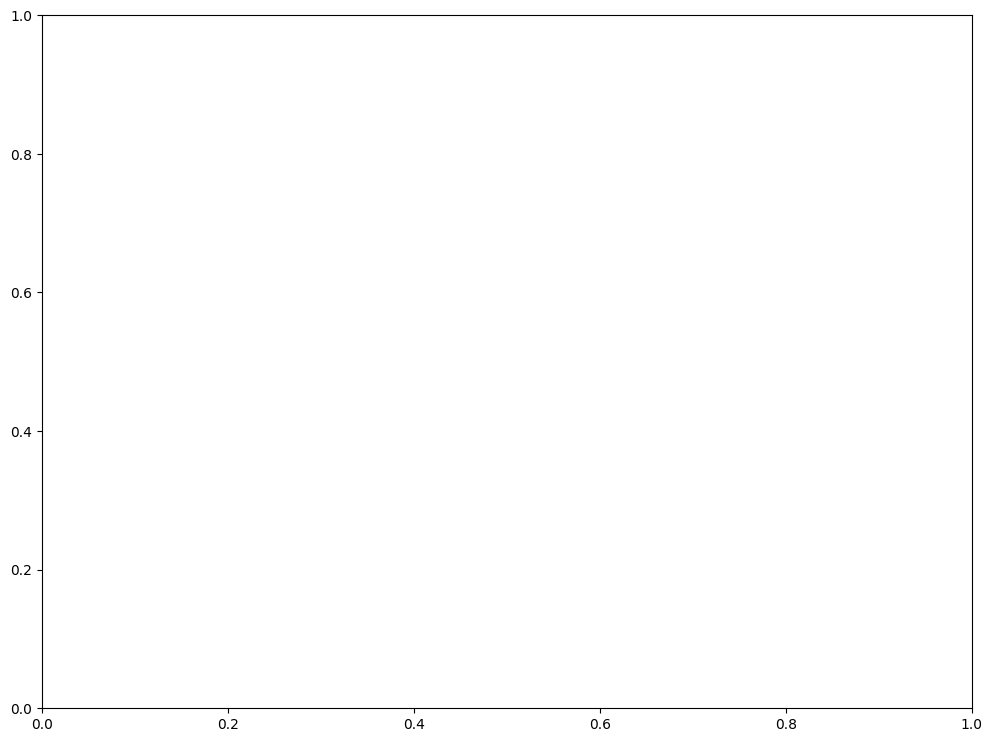

In [16]:
# Get top 2 features for 2D visualization
top_2_features = top_3_features[:2]
print(f"Using features {top_2_features[0]} and {top_2_features[1]} for 2D decision boundary")

# Extract the feature data
X = df_fe[top_2_features].values

# Fit logistic regression on these two features
lr_2d = LogisticRegression()
lr_2d.fit(X, y_binary)

# Create a meshgrid for visualization
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params, alpha=0.5)
    return out

# Create the meshgrid
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1, h=0.01)

# Plot the decision boundary and the data points
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the decision contours
contours = plot_contours(ax, lr_2d, xx, yy, cmap='RdBu', alpha=0.8)
fig.colorbar(contours, ax=ax, shrink=0.8, label='Probability of Success')

# Plot the decision boundary
coefs = lr_2d.coef_[0]
intercept = lr_2d.intercept_[0]
abline_values = np.array([xx.min(), xx.max()])
line_values = -(coefs[0] / coefs[1]) * abline_values - (intercept / coefs[1])
ax.plot(abline_values, line_values, 'k-', linewidth=3, label='Decision Boundary')

# Mark the region with probability > 0.5 (Success)
ax.contour(xx, yy, 
          lr_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape),
          levels=[0.5], colors='purple', linewidths=2, linestyles='--')

# Plot the data points with different markers and colors
classes = [0, 2]  # Dropout (0) and Success (2)
colors = ['red', 'green']
markers = ['o', '^']
labels = ['Dropout', 'Success']

for i, cls in enumerate(classes):
    mask = df_fe['Target'] == cls
    ax.scatter(df_fe.loc[mask, top_2_features[0]], 
              df_fe.loc[mask, top_2_features[1]], 
              c=colors[i], 
              marker=markers[i],
              s=80, 
              alpha=0.7, 
              edgecolor='black',
              linewidth=0.5,
              label=labels[i])

# Set labels and title
ax.set_xlabel(top_2_features[0], fontsize=14)
ax.set_ylabel(top_2_features[1], fontsize=14)
ax.set_title('2D Decision Boundary with Probability Contours', fontsize=16)
ax.legend(fontsize=12)

# Calculate and display the model details
y_pred_2d = lr_2d.predict(X)
accuracy_2d = np.mean(y_pred_2d == y_binary)

ax.text(0.05, 0.95, 
       f"Coefficients:\n - {top_2_features[0]}: {coefs[0]:.4f}\n - {top_2_features[1]}: {coefs[1]:.4f}"
       f"\nIntercept: {intercept:.4f}\n"
       f"Accuracy: {accuracy_2d:.4f}",
       transform=ax.transAxes, fontsize=12, va='top',
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"\n2D model accuracy: {accuracy_2d:.4f}")
print(f"Equation of decision boundary: {coefs[1]:.4f}*{top_2_features[1]} + {coefs[0]:.4f}*{top_2_features[0]} + {intercept:.4f} = 0")